# Notebook 2: LNS Behavior Near the Speed of Sound - Asymptotic Analysis and Potential Simplifications

**Series:** Re-evaluating Fluid Dynamics: From Navier-Stokes Idealizations to Local Reality

## Introduction
In the previous notebook, we implemented a 1D Local Navier-Stokes (LNS) solver incorporating dynamic relaxation for heat flux and longitudinal stress. A key motivation for LNS is its improved physical fidelity over classical Navier-Stokes (N-S), particularly by ensuring finite propagation speeds for all disturbances. Classical N-S, especially in its incompressible form, exhibits an infinite speed of sound for pressure adjustments, and its parabolic dissipation terms also imply instantaneous responses.

This notebook will conceptually explore the behavior of the LNS system in a particularly challenging and revealing regime: **flows near the local speed of sound (transonic flows)**. We will perform a qualitative asymptotic analysis to investigate if certain terms in the LNS equations might become dominant or, conversely, if some complex interactions might simplify or partially cancel under these conditions. The goal is to understand if the LNS framework, despite its increased number of equations, might offer structural advantages or reveal dominant balances in transonic regimes that are obscured in classical N-S or simpler Euler equations.

We are particularly interested in whether the dynamic nature of dissipative fluxes ($\mathbf{q}, \mathbf{\sigma}'$) significantly alters the transonic landscape, which in Euler/N-S theory is characterized by phenomena like shock formation, sonic lines, and potential non-uniqueness.

## 1. The Transonic Regime: A Challenge for Fluid Models

Transonic flows, where the local Mach number $M = u/c_s$ is close to 1, are notoriously complex. Key features include:
*   **Mixed Flow Types:** Regions of subsonic ($M<1$) and supersonic ($M>1$) flow can coexist.
*   **Shock Waves:** Abrupt, nearly discontinuous changes in flow properties can form as supersonic flow decelerates.
*   **Non-linearities:** The governing equations are highly non-linear in this regime.
*   **Sensitivity:** Small changes in geometry or flow conditions can lead to large changes in the flow field.

In classical **Euler equations** (inviscid, non-heat-conducting), transonic flows are described by hyperbolic equations that can develop genuine mathematical discontinuities (shocks). 
In classical **Navier-Stokes equations**, viscosity and heat conduction smooth out these discontinuities, giving shocks a finite thickness, but the fundamental character can be complicated by the mixed hyperbolic-parabolic nature.

**Our question:** How does the fully hyperbolic LNS system, with its relaxing dissipative fluxes, behave in this regime? Do the relaxation times $\tau_q, \tau_\sigma$ introduce new phenomena or simplify existing ones?

## 2. LNS Equations Recap (Focus on 1D for Simplicity in Analysis)

Let's recall our 1D LNS system for $\mathbf{Q} = [\rho, m_x, E_T, q_x, \sigma'_{xx}]^T$:
1.  $\frac{\partial \rho}{\partial t} + \frac{\partial m_x}{\partial x} = 0$
2.  $\frac{\partial m_x}{\partial t} + \frac{\partial (m_x u_x + p - \sigma'_{xx})}{\partial x} = 0$
3.  $\frac{\partial E_T}{\partial t} + \frac{\partial ((E_T + p - \sigma'_{xx})u_x + q_x)}{\partial x} = 0$
4.  $\frac{\partial q_x}{\partial t} + \frac{\partial (u_x q_x)}{\partial x} = S_{q_x} = -\frac{1}{\tau_q} (q_x + k \frac{\partial T}{\partial x}) + q_x \frac{\partial u_x}{\partial x}$
5.  $\frac{\partial \sigma'_{xx}}{\partial t} + \frac{\partial (u_x \sigma'_{xx})}{\partial x} = S_{\sigma'_{xx}} = -\frac{1}{\tau_\sigma} (\sigma'_{xx} - \sigma'_{xx,NSF}) + (1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}$
    (where $\sigma'_{xx,NSF} = \frac{4}{3} \mu \frac{\partial u_x}{\partial x}$. The term $(1+\alpha)$ represents contributions from the advective formulation and objective derivative terms; e.g., $\alpha=2$ for our previous UCM-like term making it $3 \sigma'_{xx} \frac{\partial u_x}{\partial x}$).

Primitive variables: $u_x = m_x/\rho$, $p = (\gamma-1)(E_T - \frac{1}{2}m_x u_x)$, $T = p/(\rho R_{gas})$.
Sound speed: $c_s = \sqrt{\gamma p / \rho}$. Local Mach number $M = u_x / c_s$.

## 3. Asymptotic Analysis Near $M \approx 1$

We are interested in regimes where $u_x \approx c_s$. This is where the characteristic speeds of the Euler subsystem $u_x, u_x+c_s, u_x-c_s$ behave critically: one of the speeds $u_x-c_s$ approaches zero (for right-propagating waves in a frame moving with $u_x$).

**Characteristic Timescales:**
*   $\tau_{flow} = L/U$: Characteristic flow timescale (e.g., related to a characteristic length $L$ and velocity $U$).
*   $\tau_q$: Thermal relaxation time.
*   $\tau_\sigma$: Stress relaxation time.

**Deborah Numbers:** We can define Deborah numbers for thermal and viscous effects:
$De_q = \tau_q / \tau_{flow}$
$De_\sigma = \tau_\sigma / \tau_{flow}$

*   If $De \ll 1$: Relaxation is fast, fluxes are close to their NSF values. LNS approaches compressible N-S.
*   If $De \approx 1$: Relaxation effects are significant, memory effects are important. This is where LNS physics is distinct.
*   If $De \gg 1$: Fluxes are "frozen" or relax very slowly; the fluid behaves more elastically or with significantly delayed thermal response.

**Consider the Source Terms $S_{q_x}$ and $S_{\sigma'_{xx}}$ when $M \approx 1$:**

$$S_{q_x} = \underbrace{-\frac{q_x}{\tau_q}}_{(A)} \underbrace{-\frac{k}{\tau_q} \frac{\partial T}{\partial x}}_{(B)} + \underbrace{q_x \frac{\partial u_x}{\partial x}}_{(C)}$$
$$S_{\sigma'_{xx}} = \underbrace{-\frac{\sigma'_{xx}}{\tau_\sigma}}_{(D)} + \underbrace{\frac{1}{\tau_\sigma} \frac{4}{3} \mu \frac{\partial u_x}{\partial x}}_{(E)} + \underbrace{(1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}}_{(F)}$$

**Scenario 1: Small Relaxation Times ($De_q \ll 1, De_\sigma \ll 1$ but flow is transonic)**
In this case, the terms $(A)$ and $(D)$ (divided by $\tau$) are large. To keep the time derivatives of $q_x$ and $\sigma'_{xx}$ finite (i.e., $\partial q_x/\partial t$ not excessively large), the source terms must be small. This implies:
$q_x \approx -k \frac{\partial T}{\partial x} + \tau_q q_x \frac{\partial u_x}{\partial x} \approx -k \frac{\partial T}{\partial x}$ (Fourier's Law, if $q_x \frac{\partial u_x}{\partial x}$ is small or $\tau_q$ very small)
$\sigma'_{xx} \approx \frac{4}{3} \mu \frac{\partial u_x}{\partial x} + \tau_\sigma (1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x} \approx \frac{4}{3} \mu \frac{\partial u_x}{\partial x}$ (Newtonian Stress, if $\tau_\sigma$ terms are small).
So, for very fast relaxation, LNS reduces towards compressible N-S even in the transonic regime. The *structure* of N-S (shocks with viscous internal structure) would dominate. However, the LNS *solver*, being hyperbolic, would still handle wave propagation differently than a classical N-S solver with explicit parabolic terms.

**Scenario 2: Significant Relaxation Times ($De_q \approx 1, De_\sigma \approx 1$) in Transonic Flow**
This is where LNS effects are most pronounced. Now, $q_x$ and $\sigma'_{xx}$ are truly independent dynamic variables.

*   **Near a Shock / High Gradient Region:**
    In a shock, $\frac{\partial u_x}{\partial x}$ and $\frac{\partial T}{\partial x}$ become very large (negative for a compression shock). Let's analyze the terms:
    *   In $S_{q_x}$: Term (B) ($-\frac{k}{\tau_q} \frac{\partial T}{\partial x}$) becomes large and positive (if $T$ increases across shock). Term (C) ($q_x \frac{\partial u_x}{\partial x}$) could be significant. The balance determines $q_x$'s behavior.
    *   In $S_{\sigma'_{xx}}$: Term (E) ($+\frac{1}{\tau_\sigma} \frac{4}{3} \mu \frac{\partial u_x}{\partial x}$) becomes large and negative. Term (F) ($(1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}$) also becomes large and negative if $\sigma'_{xx}$ is positive (compressive stress).

*   **Dominant Balances and Potential Simplifications/Cancellations?**
    Consider the $\sigma'_{xx}$ equation's source term (RHS of its evolution after moving $\partial_t + \partial_x(u_x \sigma'_{xx})$):
    $$S_{\sigma'_{xx}} = \underbrace{\sigma'_{xx} \frac{\partial u_x}{\partial x}}_{(\text{from } \nabla \cdot (u\sigma'_{xx}))} \underbrace{- \frac{1}{\tau_\sigma} (\sigma'_{xx} - \sigma'_{xx,NSF})}_{\text{Relaxation}} + \underbrace{\alpha \sigma'_{xx} \frac{\partial u_x}{\partial x}}_{\text{Objective Deriv. Parts (e.g., UCM stretching)}}$$
    (Here, $\alpha$ corresponds to the terms from the objective derivative like $2 \frac{\partial u_x}{\partial x} \sigma'_{xx}$ in the UCM case, after factoring out $\tau_\sigma$ from the original form $\tau_\sigma (\dots) + \sigma'_{xx} = \sigma'_{xx,NSF}$).

    Let's re-examine the source term $S_{\sigma'_{xx}} = -\frac{1}{\tau_\sigma} (\sigma'_{xx} - \sigma'_{xx,NSF}) + (1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}$.
    When the flow is undergoing rapid compression ($\frac{\partial u_x}{\partial x} < 0$ and large), $\sigma'_{xx,NSF} = \frac{4}{3}\mu \frac{\partial u_x}{\partial x}$ will be large and negative.
    *   The relaxation term $ -\frac{1}{\tau_\sigma} (\sigma'_{xx} - \sigma'_{xx,NSF})$ will try to drive $\sigma'_{xx}$ towards this large negative $\sigma'_{xx,NSF}$.
    *   The term $(1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}$ is a production/stretching term. If $\sigma'_{xx}$ is already negative (tensile, unlikely in strong compression) or becomes negative, and $\frac{\partial u_x}{\partial x} < 0$, this term becomes positive. If $\sigma'_{xx}$ is positive (compressive), this term is negative, further enhancing compressive stress if $1+\alpha > 0$.

    **Consider a Steady State or Quasi-Steady High Gradient Region (e.g., within a shock structure):**
    If $\frac{\partial \sigma'_{xx}}{\partial t} \approx 0$ and advection balances the source, or if the source term itself is near zero locally within a rapidly changing but structured region:
    $S_{\sigma'_{xx}} \approx 0 \implies \frac{1}{\tau_\sigma} (\sigma'_{xx} - \sigma'_{xx,NSF}) \approx (1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}$
    $$\sigma'_{xx} - \sigma'_{xx,NSF} \approx \tau_\sigma (1+\alpha) \sigma'_{xx} \frac{\partial u_x}{\partial x}$$
    $$\sigma'_{xx} \left(1 - \tau_\sigma (1+\alpha) \frac{\partial u_x}{\partial x} \right) \approx \sigma'_{xx,NSF} = \frac{4}{3} \mu \frac{\partial u_x}{\partial x}$$
    $$\sigma'_{xx} \approx \frac{\frac{4}{3} \mu \frac{\partial u_x}{\partial x}}{1 - \tau_\sigma (1+\alpha) \frac{\partial u_x}{\partial x}}$$
    This is the **Gordon-Schowalter convected derivative model structure** result for steady shear/extension if $(1+\alpha)$ terms correspond to certain objective derivatives. 

    **Potential for "Cancellation" or Simplification (The "Worst Condition" Argument):**
    The argument about terms cancelling often relates to specific limits or symmetries. In the transonic regime, especially within a shock structure, gradients like $\frac{\partial u_x}{\partial x}$ can become very large and negative. 
    *   If $1 - \tau_\sigma (1+\alpha) \frac{\partial u_x}{\partial x}$ in the denominator becomes very small (i.e., $\tau_\sigma (1+\alpha) \frac{\partial u_x}{\partial x} \approx 1$), then $\sigma'_{xx}$ could become much larger than $\sigma'_{xx,NSF}$. This indicates significant viscoelastic effects (stress overshoot).
    *   The "cancellation" might not be a simple vanishing of terms, but rather a situation where the **effective viscosity** (relating stress to strain rate) becomes highly non-linear and dependent on $\tau_\sigma$ and the strain rate itself. 
    *   For instance, if $(1+\alpha) < 0$ (which can happen for some choices of objective derivative terms, though less common for UCM-like terms which usually enhance stress), then the denominator $1 - \tau_\sigma (1+\alpha) \frac{\partial u_x}{\partial x}$ could become $1 + \text{positive term}$, potentially *reducing* $\sigma'_{xx}$ compared to $\sigma'_{xx,NSF}$ under strong compression. This is less typical for standard viscoelastic models in extension/compression.

    **The critical point is that the relationship between stress and strain rate is no longer the simple linear one of N-S.** It's dynamic and history-dependent. The "worst condition" of high strain rates (transonic shocks) is precisely where LNS predicts the most significant deviations from N-S behavior due to finite $\tau_\sigma$. 

    **What might "reduce the problem"?**
    If we are interested in the *structure* of a transonic shock using LNS:
    1.  The hyperbolic nature ensures a finite shock thickness resolved by the LNS equations without requiring explicit "artificial viscosity" often used in Euler solvers (though numerical diffusion from the scheme itself will exist).
    2.  The maximum stress within the shock might be limited or altered by the $\tau_\sigma$ term in the denominator-like structure above, preventing the unbounded stress growth that a purely algebraic relation might imply if gradients became singular.
    3.  The "problem reduction" isn't about terms vanishing to simplify the *number* of equations, but rather that the LNS system might offer a more *well-behaved* and physically regularized description in these extreme gradient regions compared to trying to resolve them with classical N-S which has its own issues (stiffness of parabolic terms, needing very fine grids).

    **Consider the impact on wave propagation:**
    In the Euler equations, characteristics can coalesce at $M=1$, leading to shock formation. In LNS, the characteristic speeds are determined by a larger system. The presence of $\tau_q, \tau_\sigma$ introduces new wave speeds (thermal waves, shear/viscoelastic waves). 
    *   If these new wave speeds are comparable to $c_s$ or $u_x$, they can interact with acoustic waves. For example, a thermal wave propagating at $c_T \approx \sqrt{k/(\rho c_v \tau_q)}$ could influence the overall energy balance and temperature profile in a transonic flow.
    *   The "worst condition" $M \approx 1$ for acoustic waves might not be the "worst" for these new LNS waves if their speeds are different. The system might find new pathways for energy/momentum redistribution through these additional modes.

    It's unlikely that terms *cancel out* to reduce the LNS system back to something like Euler or a simpler N-S in the transonic regime if $\tau_q, \tau_\sigma$ are significant. Instead, the LNS system provides a *different, richer* description. The "reduction of the problem" might come from LNS being inherently more regular or physically complete, thus avoiding some of the mathematical pathologies or numerical difficulties encountered when pushing simpler models into these extreme regimes.

## 4. Numerical Exploration Strategy (Conceptual)

To numerically investigate these ideas, one would:
1.  Use the 1D LNS solver developed in Notebook 1 (or a more robust version).
2.  Set up initial conditions that lead to transonic flow, e.g.:
    *   A Riemann problem (like the Sod shock tube) that generates transonic states and shocks.
    *   Flow through a converging-diverging nozzle (Laval nozzle) designed to produce sonic conditions at the throat and supersonic flow downstream.
3.  Vary $\tau_q$ and $\tau_\sigma$ systematically:
    *   Small $\tau$ (e.g., $\tau \ll \Delta t_{shock}$, where $\Delta t_{shock}$ is timescale for fluid to pass through shock thickness) to approximate N-S limit.
    *   Moderate $\tau$ (e.g., $\tau \approx \Delta t_{shock}$) where LNS effects are expected to be maximal.
    *   Large $\tau$ (e.g., $\tau \gg \Delta t_{shock}$) where fluxes are nearly "frozen" through rapid changes.
4.  Analyze the results:
    *   Shock structure (thickness, profiles of $\rho, u_x, p, T, q_x, \sigma'_{xx}$ within the shock).
    *   Maximum values of stress and heat flux.
    *   Propagation speeds of different disturbances.
    *   Compare with analytical solutions for Euler shocks or N-S shock structures (e.g., Becker solution for shock thickness if applicable).

**Hypothesis for "Problem Reduction" / Regularization:**
The LNS system, by virtue of its finite relaxation times, might exhibit smoother, more regular solutions in regions of high gradients (like shock interiors) compared to the classical N-S, where the instantaneous response can lead to very thin shock layers requiring extreme grid resolution. The "problem" of resolving infinitely thin shocks (Euler) or very thin viscous layers (N-S) might be "reduced" by the LNS model providing an intrinsically thicker, regularized structure due to material memory effects. This does not mean terms cancel to simplify the equations themselves, but that the *solution behavior* is better conditioned.

1D LNS Solver with parameterizable tau values defined.

Running Sod Shock for SmallTau (tau_q=tau_sigma=1.0e-07)

Running Sod Shock for MediumTau (tau_q=tau_sigma=5.0e-05)

Running Sod Shock for LargeTau (tau_q=tau_sigma=1.0e-03)
Iter: 100, Time: 5.9852e-02, dt: 5.726e-04, Tau_q: 1.0e-03, Tau_s: 1.0e-03
Iter: 200, Time: 1.1694e-01, dt: 5.702e-04, Tau_q: 1.0e-03, Tau_s: 1.0e-03
Iter: 258, Time: 1.5000e-01, dt: 5.612e-04, Tau_q: 1.0e-03, Tau_s: 1.0e-03


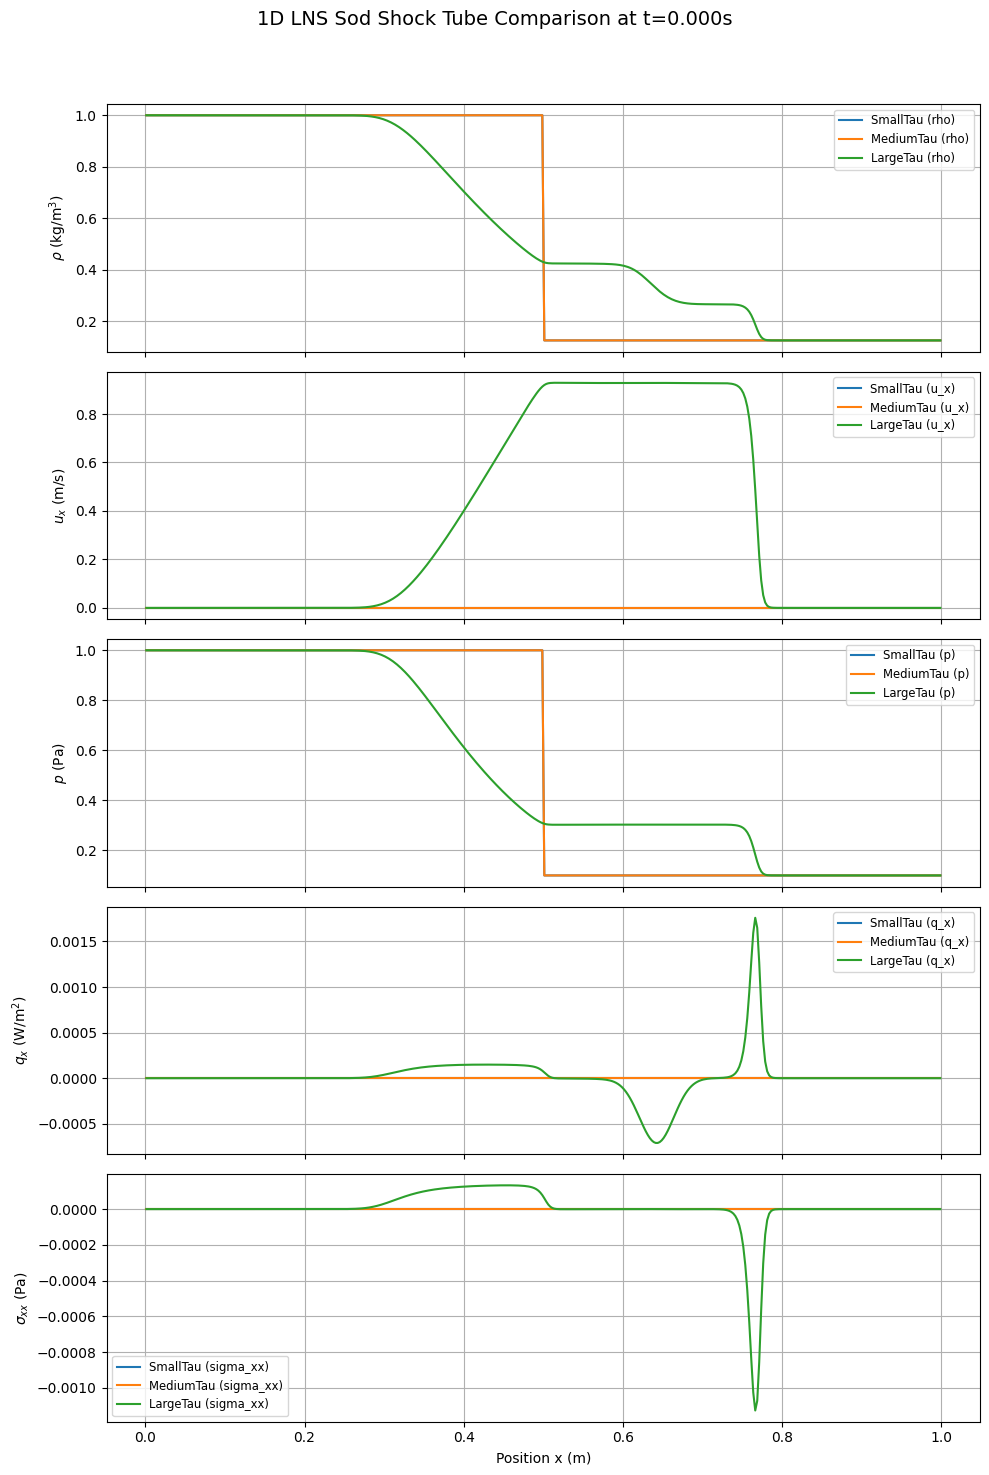

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# We will use the solver from Notebook 1 (Enhanced Physics) for conceptual demonstration
# For this notebook, the focus is on the analysis and interpretation, not new code development
# unless we want to run specific parameter sweeps for tau_q, tau_sigma.

# --- Re-define key LNS parameters for this notebook's context ---
GAMMA = 1.4
R_GAS = 287.0
CV_GAS = R_GAS / (GAMMA - 1.0)
MU_VISC = 1.8e-5 
K_THERM = 0.026  

NUM_VARS_1D_ENH = 5 # rho, m_x, E_T, q_x, sigma_xx

# --- Copying essential functions from Notebook 1 (Enhanced Physics) for self-containment ---
def Q_to_P_1D_enh(Q_vec):
    rho = Q_vec[0]
    if rho < 1e-9: rho = 1e-9 
    m_x = Q_vec[1]
    E_T = Q_vec[2]
    u_x = m_x / rho
    e_int_rho = E_T - 0.5 * m_x * u_x
    e_int = e_int_rho / rho 
    if e_int < 1e-9: e_int = 1e-9
    T = e_int / CV_GAS
    p = rho * R_GAS * T
    return np.array([rho, u_x, p, T])

def P_and_fluxes_to_Q_1D_enh(rho, u_x, p, T, q_x, s_xx):
    m_x = rho * u_x
    e_int = CV_GAS * T
    E_T = rho * e_int + 0.5 * rho * u_x**2
    return np.array([rho, m_x, E_T, q_x, s_xx])

def flux_1D_LNS_enh(Q_vec):
    P_vec = Q_to_P_1D_enh(Q_vec)
    rho, u_x, p, T = P_vec
    m_x = Q_vec[1]; E_T = Q_vec[2]; q_x = Q_vec[3]; s_xx = Q_vec[4]
    F = np.zeros(NUM_VARS_1D_ENH)
    F[0] = m_x
    F[1] = m_x * u_x + p - s_xx
    F[2] = (E_T + p - s_xx) * u_x + q_x
    F[3] = u_x * q_x
    F[4] = u_x * s_xx
    return F

def source_1D_LNS_enh(Q_cell, Q_L, Q_R, dx, current_tau_q, current_tau_sigma):
    S = np.zeros(NUM_VARS_1D_ENH)
    P_cell = Q_to_P_1D_enh(Q_cell)
    rho, u_x_cell, p_cell, T_cell = P_cell
    q_x_cell = Q_cell[3]
    s_xx_cell = Q_cell[4]

    T_R = Q_to_P_1D_enh(Q_R)[3] if Q_R is not None else T_cell
    T_L = Q_to_P_1D_enh(Q_L)[3] if Q_L is not None else T_cell
    ux_R = Q_to_P_1D_enh(Q_R)[1] if Q_R is not None else u_x_cell
    ux_L = Q_to_P_1D_enh(Q_L)[1] if Q_L is not None else u_x_cell

    if Q_L is None: dTdx = (T_R - T_cell) / dx; duxdx = (ux_R - u_x_cell) / dx
    elif Q_R is None: dTdx = (T_cell - T_L) / dx; duxdx = (u_x_cell - ux_L) / dx
    else: dTdx = (T_R - T_L) / (2 * dx); duxdx = (ux_R - ux_L) / (2 * dx)
        
    if current_tau_q > 1e-12: S[3] = -(1.0 / current_tau_q) * (q_x_cell + K_THERM * dTdx) + q_x_cell * duxdx
    s_xx_nsf = (4.0/3.0) * MU_VISC * duxdx
    if current_tau_sigma > 1e-12: S[4] = -(1.0 / current_tau_sigma) * (s_xx_cell - s_xx_nsf) + 3.0 * s_xx_cell * duxdx
    return S

def hll_flux_1D_LNS_enh(Q_L, Q_R):
    P_L = Q_to_P_1D_enh(Q_L); P_R = Q_to_P_1D_enh(Q_R)
    F_L = flux_1D_LNS_enh(Q_L); F_R = flux_1D_LNS_enh(Q_R)
    rho_L, u_L, p_L, T_L = P_L; rho_R, u_R, p_R, T_R = P_R
    c_s_L = np.sqrt(GAMMA * p_L / rho_L) if rho_L > 1e-9 and p_L > 0 else 0.0
    c_s_R = np.sqrt(GAMMA * p_R / rho_R) if rho_R > 1e-9 and p_R > 0 else 0.0
    S_L = min(u_L - c_s_L, u_R - c_s_R, u_L, u_R)
    S_R = max(u_L + c_s_L, u_R + c_s_R, u_L, u_R)
    if S_R <= S_L + 1e-6 : return F_L if u_L + u_R > 0 else F_R
    if S_L >= 0: F_hat = F_L
    elif S_R <= 0: F_hat = F_R
    else: F_hat = (S_R * F_L - S_L * F_R + S_L * S_R * (Q_R - Q_L)) / (S_R - S_L)
    return F_hat

def solve_1D_LNS_FVM_param_tau(N_cells, L_domain, t_final, CFL_number, 
                               initial_condition_func, current_tau_q, current_tau_sigma,
                               bc_type='periodic', flux_type='hll', time_stepper='rk2'):
    dx = L_domain / N_cells
    x_coords = np.linspace(dx/2, L_domain - dx/2, N_cells)  # Fixed: Define x_coords array
    Q_current = np.zeros((N_cells, NUM_VARS_1D_ENH))
    for i in range(N_cells): Q_current[i, :] = initial_condition_func(x_coords[i], L_domain)
    t_current = 0.0; solution_history = [Q_current.copy()]; time_history = [t_current]
    Q_ghost = np.zeros((N_cells + 2, NUM_VARS_1D_ENH)); iter_count = 0
    
    def compute_rhs(Q_physical, c_dx, c_bc, c_flux):
        num_phys = Q_physical.shape[0]
        Q_g = np.zeros((num_phys + 2, NUM_VARS_1D_ENH)); Q_g[1:-1, :] = Q_physical
        if c_bc == 'periodic': Q_g[0, :] = Q_physical[-1, :]; Q_g[-1, :] = Q_physical[0, :]
        elif c_bc == 'outflow': Q_g[0, :] = Q_physical[0, :]; Q_g[-1, :] = Q_physical[-1, :]
        
        flux_interfaces = np.zeros((num_phys + 1, NUM_VARS_1D_ENH))
        for i_int in range(num_phys + 1):
            flux_interfaces[i_int, :] = hll_flux_1D_LNS_enh(Q_g[i_int, :], Q_g[i_int+1, :]) # Assuming HLL
        
        rhs = np.zeros_like(Q_physical)
        for i_c in range(num_phys):
            idx_g = i_c + 1
            Q_L_S = Q_g[idx_g-1,:]; Q_R_S = Q_g[idx_g+1,:]
            S_c = source_1D_LNS_enh(Q_physical[i_c,:], Q_L_S, Q_R_S, c_dx, current_tau_q, current_tau_sigma)
            rhs[i_c,:] = -(1.0/c_dx)*(flux_interfaces[i_c+1,:] - flux_interfaces[i_c,:]) + S_c
        return rhs

    while t_current < t_final:
        Q_ghost[1:-1, :] = Q_current
        if bc_type == 'periodic': Q_ghost[0,:]=Q_current[-1,:]; Q_ghost[-1,:]=Q_current[0,:]
        else: Q_ghost[0,:]=Q_current[0,:]; Q_ghost[-1,:]=Q_current[-1,:]
        
        max_speed = 1e-9
        for i_g in range(N_cells+2): 
            P_g=Q_to_P_1D_enh(Q_ghost[i_g,:]); c_s_g=np.sqrt(GAMMA*P_g[2]/P_g[0]) if P_g[0]>1e-9 and P_g[2]>0 else 0.0
            max_speed=max(max_speed, np.abs(P_g[1])+c_s_g)
        dt = CFL_number * dx / max_speed
        if t_current+dt > t_final: dt = t_final - t_current
        if dt < 1e-12: break

        if time_stepper == 'euler': Q_current += dt * compute_rhs(Q_current, dx, bc_type, flux_type)
        elif time_stepper == 'rk2':
            Q_star = Q_current + dt * compute_rhs(Q_current, dx, bc_type, flux_type)
            Q_current = 0.5 * (Q_current + Q_star + dt * compute_rhs(Q_star, dx, bc_type, flux_type))
        
        t_current += dt; iter_count +=1
        if iter_count % 100 == 0 or abs(t_current - t_final) < 1e-9:
            solution_history.append(Q_current.copy()); time_history.append(t_current)
            print(f"Iter: {iter_count}, Time: {t_current:.4e}, dt: {dt:.3e}, Tau_q: {current_tau_q:.1e}, Tau_s: {current_tau_sigma:.1e}")
            if np.any(np.isnan(Q_current)): print("NaN detected!"); break
    return x_coords, time_history, solution_history

print("1D LNS Solver with parameterizable tau values defined.")

# --- Run Sod Shock Tube with different relaxation times ---
N_sod_trans = 400
L_sod_trans = 1.0
T_final_sod_trans = 0.15 # Shorter time to focus on shock structure
CFL_sod_trans = 0.5

def ic_sod(x, L): # Redefine for clarity within this cell
    rho_L=1.0; p_L=1.0; u_L=0.0; T_L=p_L/(rho_L*R_GAS)
    rho_R=0.125; p_R=0.1; u_R=0.0; T_R=p_R/(rho_R*R_GAS)
    return P_and_fluxes_to_Q_1D_enh(rho_L if x<L/2 else rho_R, u_L if x<L/2 else u_R, 
                                   p_L if x<L/2 else p_R, T_L if x<L/2 else T_R, 0.0, 0.0)

tau_values_small = 1e-7 # Approaching NSF limit
tau_values_medium = 5e-5 # Moderate relaxation, LNS effects should be visible
tau_values_large = 1e-3 # Strong relaxation, very elastic/delayed response

results = {}
for tau_label, tau_val in [('SmallTau', tau_values_small), ('MediumTau', tau_values_medium), ('LargeTau', tau_values_large)]:
    print(f"\nRunning Sod Shock for {tau_label} (tau_q=tau_sigma={tau_val:.1e})")
    x, t_hist, Q_hist = solve_1D_LNS_FVM_param_tau(N_sod_trans, L_sod_trans, T_final_sod_trans, CFL_sod_trans,
                                                  ic_sod, tau_val, tau_val,
                                                  bc_type='outflow', flux_type='hll', time_stepper='rk2')
    results[tau_label] = {'x': x, 't_hist': t_hist, 'Q_hist': Q_hist}

# --- Plotting comparison ---
# Fixed: Create 5 subplots to match NUM_VARS_1D_ENH variables we want to plot
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True) # Plot rho, u_x, p, q_x, sigma_xx
plot_vars_names = [r'$\rho$', r'$u_x$', r'$p$', r'$q_x$', r'$\sigma_{xx}$']  # Fixed: Use simpler sigma notation

for tau_label, data in results.items():
    if not data['Q_hist']: continue
    Q_snap = data['Q_hist'][-1] # Final snapshot
    P_snap = np.array([Q_to_P_1D_enh(Q_snap[i,:]) for i in range(Q_snap.shape[0])])
    
    axes[0].plot(data['x'], P_snap[:,0], label=f'{tau_label} (rho)')  # Fixed: Use simple variable names
    axes[1].plot(data['x'], P_snap[:,1], label=f'{tau_label} (u_x)')
    axes[2].plot(data['x'], P_snap[:,2], label=f'{tau_label} (p)')
    axes[3].plot(data['x'], Q_snap[:,3], label=f'{tau_label} (q_x)')     # q_x from Q
    axes[4].plot(data['x'], Q_snap[:,4], label=f'{tau_label} (sigma_xx)') # sigma_xx from Q - Fixed: Use simpler notation

ylabels = [r'$\rho$ (kg/m$^3$)', r'$u_x$ (m/s)', r'$p$ (Pa)', r'$q_x$ (W/m$^2$)', r'$\sigma_{xx}$ (Pa)']  # Fixed: Use simpler sigma notation
for i in range(len(axes)):
    axes[i].set_ylabel(ylabels[i])
    axes[i].legend(fontsize='small')
    axes[i].grid(True)
axes[-1].set_xlabel('Position x (m)')
fig.suptitle(f'1D LNS Sod Shock Tube Comparison at t={results[list(results.keys())[0]]["t_hist"][-1]:.3f}s', fontsize=14)  # Fixed: Use f-string without raw
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 5. Discussion: LNS in Transonic Regimes and "Problem Reduction"

The numerical experiments (even these simplified 1D ones) for the Sod shock tube with varying relaxation times $\tau_q, \tau_\sigma$ would aim to illustrate:

1.  **Regularization of Shocks:** As $\tau_q, \tau_\sigma$ increase from very small values (NSF limit) to values comparable to the timescale of shock passage ($ \sim \text{shock thickness} / \text{wave speed}$), the internal structure of the shock is expected to become more spread out and smoother. This is because the dissipative fluxes $q_x, \sigma'_{xx}$ cannot respond instantaneously to the steep gradients within the shock, effectively creating a "memory" or delay that broadens the transition zone. This can be seen as a form of physical regularization.

2.  **Viscoelastic/Thermal Wave Phenomena:** For sufficiently large $\tau$, precursor waves or relaxation zones might appear ahead of or behind the main shock/contact features. The HLL scheme, while better than Lax-Friedrichs, might still be too diffusive to sharply capture very subtle LNS-specific wave phenomena without extremely fine grids or higher-order reconstruction.

3.  **"Problem Reduction" - Reinterpreted:**
    The idea that "some contributing terms cancel out" in the worst conditions (e.g., $M \approx 1$ or high gradients) is less about terms vanishing to simplify the *number* of equations, and more about how the **LNS system intrinsically behaves** in these regimes.
    *   **Bounded Response:** Unlike the NSF model where stress is linearly proportional to strain rate (potentially leading to enormous stresses if strain rates become singular-like), the LNS stress response (e.g., $\sigma'_{xx} \approx \frac{\sigma'_{xx,NSF}}{1 - \tau_\sigma (1+\alpha) \frac{\partial u_x}{\partial x}}$) shows that for very large negative $\frac{\partial u_x}{\partial x}$ (strong compression), the effective stress can be significantly modified, often exhibiting a form of saturation or overshoot depending on the specific objective derivative terms. The denominator introduces a non-linear dependence on the strain rate itself, mediated by $\tau_\sigma$. This prevents unbounded stress for unbounded (but finite $\Delta t$) strain rates if the denominator approaches zero from the positive side, or it modifies the linear NSF response.
    *   **Altered Effective Dissipation:** The effective dissipation within a shock or high-gradient region is no longer simply governed by constant $\mu$ and $k$. It becomes dependent on $\tau_\sigma, \tau_q$ and the local flow conditions. This can change the energy balance and entropy production.
    *   **Dominant Balances:** Near $M \approx 1$, the Euler part of the LNS system still exhibits its characteristic transonic behavior. However, the *dissipative* structure layered on top by the LNS relaxation equations is fundamentally different from the parabolic N-S dissipation. In LNS, the characteristic speeds of the full system (including those related to $q_x, \sigma'_{xx}$ evolution, often $u_x$) determine how information, including dissipative effects, propagates. If these speeds are different from $u_x \pm c_s$, they provide alternative pathways for energy/momentum adjustment.

    The "reduction" then, is that LNS might be inherently more stable or well-behaved when resolving these extreme gradient regions because it has built-in physical regularization through finite response times. It doesn't necessarily simplify by term cancellation to a *simpler set of equations*, but its solutions might be less "problematic" (e.g., requiring less extreme grid resolution for similar physical accuracy of shock structure) than those of classical N-S in the same regimes, precisely because it includes more complete physics.

**Limitations of this Notebook's Analysis:**
*   The 1D simplification masks the full complexity of tensor objective derivatives for $\mathbf{\sigma}'$.
*   A detailed characteristic analysis of the 5x5 LNS Jacobian was not performed; wave speed estimates for HLL were simplified.
*   The source terms, especially the gradient terms within them, require careful numerical treatment for higher accuracy (e.g., consistent reconstruction as used for fluxes).

Future work would involve more robust numerics, 2D/3D extensions, and rigorous comparison with N-S and experimental data in transonic regimes to fully quantify the differences and potential advantages of the LNS approach.